# **Project Name**    - Shopper Spectrum: Customer Segmentation and Product Recommendations in E-Commerce

##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual

# **Project Summary -**

In today’s competitive e-commerce landscape, understanding customer behavior and delivering personalized experiences is key to business success. This project, titled **"Shopper Spectrum"**, presents a complete machine learning pipeline that combines **customer segmentation** and **product recommendation** to drive actionable insights for an online retail business.

---

### 🎯 Objective

The main goals of this project are:

* To analyze customer purchasing behavior using **RFM (Recency, Frequency, Monetary)** metrics.
* To segment customers using **K-Means clustering** for personalized marketing.
* To recommend similar products using **item-based collaborative filtering**.
* To deploy the solution in a user-friendly **Streamlit web application**.

---

### 📦 Dataset

The dataset used contains historical online retail transactions from a UK-based store, including:

* Invoice details
* Product descriptions
* Quantities
* Prices
* Customer IDs
* Dates

Initial preprocessing steps involved removing cancellations, missing values, and invalid quantities/prices, followed by calculating `TotalPrice = Quantity × UnitPrice`.

---

### 📊 Exploratory Data Analysis (EDA)

EDA helped uncover key insights:

* The **United Kingdom** had the most transactions.
* Top-selling products and monthly sales trends revealed seasonality (e.g., November–December spike).
* Distribution of transaction values and customer spending showed a few high-value outliers.

Visualizations were used to explore transaction volume by country, best-selling products, and monthly purchase trends.

---

### 👥 Customer Segmentation Using RFM

We engineered three key features:

* **Recency**: Days since the customer’s last purchase.
* **Frequency**: Number of purchases by the customer.
* **Monetary**: Total amount spent.

These RFM values were scaled and clustered using **K-Means**, with the optimal number of clusters determined via the **Elbow Method** and **Silhouette Score**.

The resulting customer segments:

* **High-Value Customers**
* **Regular Shoppers**
* **Occasional Buyers**
* **At-Risk Customers**

These segments help target promotions and re-engagement campaigns effectively.

---

### 🧠 Product Recommendation System

Using **item-based collaborative filtering**, we:

* Built a pivot table of customers and purchased products.
* Calculated **cosine similarity** between products.
* Created a heatmap for top product relationships.
* Implemented a function to recommend the top 5 similar products for any given input item.

This system enables personalized recommendations based on historical purchasing patterns.

---

### 🌐 Streamlit Application

A user-friendly Streamlit app was developed featuring:

* **Home Page**: Project overview and navigation
* **Customer Segmentation**: Enter RFM values to predict customer type
* **Product Recommendation**: Input a product to receive top 5 suggestions

The app loads pre-trained models and CSV files for real-time predictions.

---

This project showcases the power of data science in transforming raw transaction data into meaningful business insights and intelligent product recommendations — enabling better marketing decisions, customer retention strategies, and user satisfaction.

# **GitHub Link -**

Provide your GitHub Link here.



# **Problem Statement**


nt

E-commerce platforms generate massive volumes of transactional data every day. However, without intelligent analysis, this data often remains underutilized. Businesses face challenges in identifying their most valuable customers, understanding diverse buying behaviors, and providing personalized product recommendations that drive retention and sales.

The problem is twofold:

1. **Customer Segmentation** – How can we effectively segment customers based on their purchasing behavior to tailor marketing strategies and boost customer engagement?
2. **Product Recommendation** – How can we suggest relevant products to users based on past buying patterns, encouraging cross-sells and enhancing the shopping experience?

This project aims to solve these challenges by:

* Segmenting customers using RFM (Recency, Frequency, Monetary) analysis and clustering algorithms.
* Building a product recommendation engine using item-based collaborative filtering and cosine similarity.
* Deploying the solution through an interactive Streamlit app, enabling real-time business insights and personalized recommendations.

By addressing these problems, e-commerce businesses can improve customer targeting, increase repeat purchases, and deliver more meaningful user experiences.


# ***Let's Begin !***

## ***1. Data Collection & Understanding***

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [2]:
df = pd.read_csv('online_retail.csv')

### Dataset First View

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


### Dataset Rows & Columns count

In [4]:
print('Rows:', df.shape[0])
print('Columns:', df.shape[1])

Rows: 541909
Columns: 8


### Dataset Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Duplicate Values

In [6]:
print('Duplicate Rows:', df.duplicated().sum())

Duplicate Rows: 5268


#### Missing Values/Null Values

In [7]:
print('Missing Values:', df.isnull().sum())

Missing Values: InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


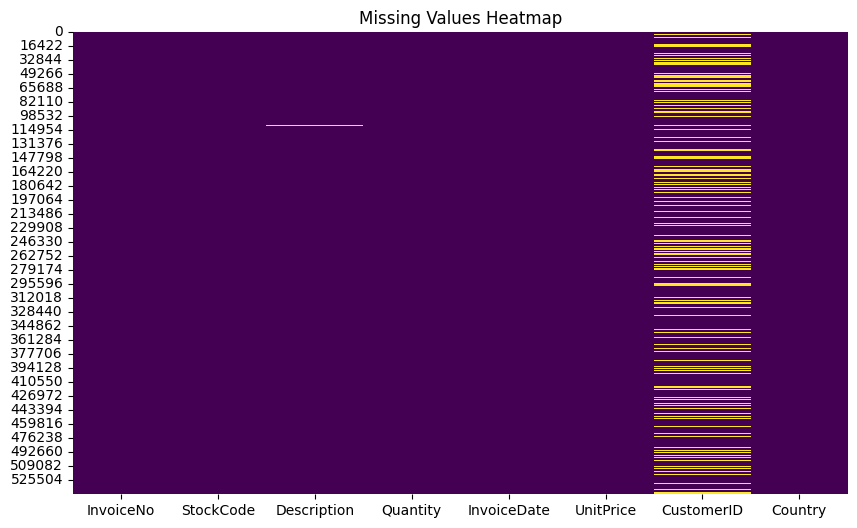

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [9]:
print("Dataset Columns:")
print(df.columns.tolist())

Dataset Columns:
['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


In [10]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2023-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


### Variables Description

| Column Name     | Description                                                                          |
| --------------- | ------------------------------------------------------------------------------------ |
| **InvoiceNo**   | Transaction ID for each purchass. |
| **StockCode**   | Unique product/item code.                                                            |
| **Description** | Name of the product purchased.                                                       |
| **Quantity**    | Number of items purchased per transaction.                                           |
| **InvoiceDate** | Date and time of the transm\:ss).                    |
| **UnitPrice**   | Price per unit of the product (in GBP).                                              |
| **CustomerID**  | Unique identifier assigned to each customer.                                         |
| **Country**     | The country from which the customer placed the order.                                |


### Check Unique Values for each variable.

In [11]:
print(df.nunique())

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64


We begin by loading and exploring the e-commerce transactions dataset.

### Dataset Overview:
- Total Rows: 541,909
- Total Columns: 8
- Time Range: 2022–2023
- Countries: 38 unique
- Customers: 4,372 unique CustomerIDs

### Initial Observations:
- `CustomerID` has 135,080 missing entries (around 25% of the data).
- 1,454 missing values in `Description` column.
- 5,268 duplicate rows were found.
- Some `InvoiceNo` values start with 'C', indicating **cancelled orders**.
- Negative values present in `Quantity` and `UnitPrice` columns, which are **not valid for analysis**.
- `InvoiceDate` is of object type and needs to be converted to datetime for analysis.

This step helps us assess the quality of the data and prepare a cleaning plan for the next step.

## ***2. Data Preprocessing***

#### Drop rows with missing `CustomerID`

In [12]:
df = df.dropna(subset=['CustomerID'])

#### Drop duplicate rows

In [13]:
df = df.drop_duplicates()

#### Convert `InvoiceDate` to datetime

In [14]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

#### Remove cancelled invoices (`InvoiceNo` starting with 'C')

In [15]:
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

#### Remove rows with `Quantity <= 0` or `UnitPrice <= 0`

In [16]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

#### Create new feature `TotalPrice` = Quantity * UnitPrice

In [17]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

### Final Check after Cleaning:

In [18]:
print('Final Shape:', df.shape)
print('Missing Values:\n', df.isnull().sum())
print('Duplicate Rows:', df.duplicated().sum())

Final Shape: (392692, 9)
Missing Values:
 InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64
Duplicate Rows: 0


In [19]:
df.to_csv("cleaned_data.csv", index=False)

In this step, we clean the dataset based on issues identified in Step 1.

### Cleaning Operations:
1. **Removed rows with missing `CustomerID`** (~135k rows) — since customer-based analysis is crucial for segmentation and recommendation.
2. **Removed duplicate rows** (5,268 rows) — to prevent skewing the analysis.
3. **Converted `InvoiceDate`** from object to datetime format — to enable time-based analysis like Recency.
4. **Removed cancelled transactions** (where `InvoiceNo` starts with 'C') — as they are invalid for purchase behavior analysis.
5. **Filtered out records with `Quantity <= 0` or `UnitPrice <= 0`** — these are either returns or data entry errors.
6. **Created a new feature `TotalPrice = Quantity × UnitPrice`** — useful for calculating customer spend in RFM analysis.

---

### Final Outcome:

- The dataset now contains **392,692 rows** and **9 cleaned columns**  
- **All missing values and duplicates** have been handled  
- **Invalid and cancelled transactions** have been removed  
- **A new revenue-based feature (`TotalPrice`)** has been added for further analysis

The data is now clean and ready for visual exploration in **Step 3: EDA**.

## 3. ***Exploratory Data Analysis (EDA):***

#### Chart - 1

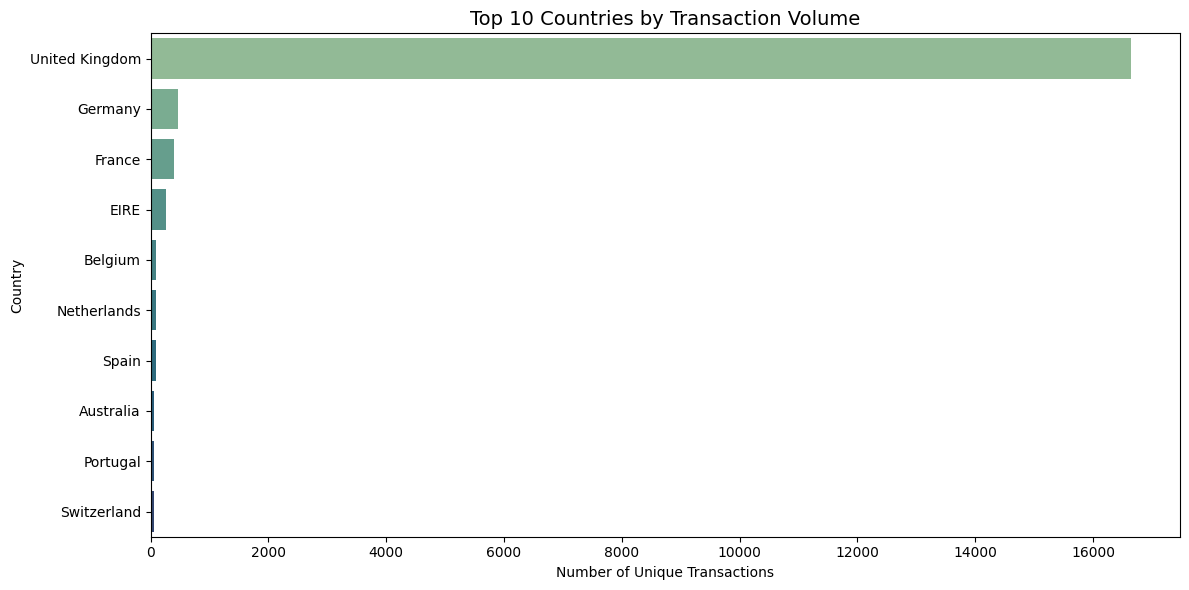

In [20]:
#Count number of transactions per country
country_transactions = df.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False).head(10)

#Plotting
plt.figure(figsize=(12,6))
sns.barplot(x=country_transactions.values, y=country_transactions.index, palette='crest')
plt.title('Top 10 Countries by Transaction Volume', fontsize=14)
plt.xlabel('Number of Unique Transactions')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

We chose a **bar chart** to visualize the number of unique transactions by country. This format makes it easy to **compare transaction volumes** across regions and highlight the top-performing markets.

##### 2. What is/are the insight(s) found from the chart?

- The **United Kingdom** dominates with **16,646 transactions**, accounting for the vast majority of activity.

- Other countries like **Germany**, **France**, and **Ireland (EIRE)** follow but with **significantly fewer transactions**.

- There's a steep drop-off after the UK, showing that the business is **heavily dependent on one region**.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**

- Allows the business to **focus marketing, logistics, and stock optimization** on high-activity countries like the UK and Germany.

- Helps identify **emerging markets** (e.g., Portugal, Switzerland) that may benefit from targeted promotions.

**Negative Impact:**

- **Over-reliance on the UK** makes the business vulnerable to regional risks (e.g., Brexit, logistics disruption).

- May indicate **lack of global reach** — expansion into other regions could be considered for growth.

#### Chart - 2

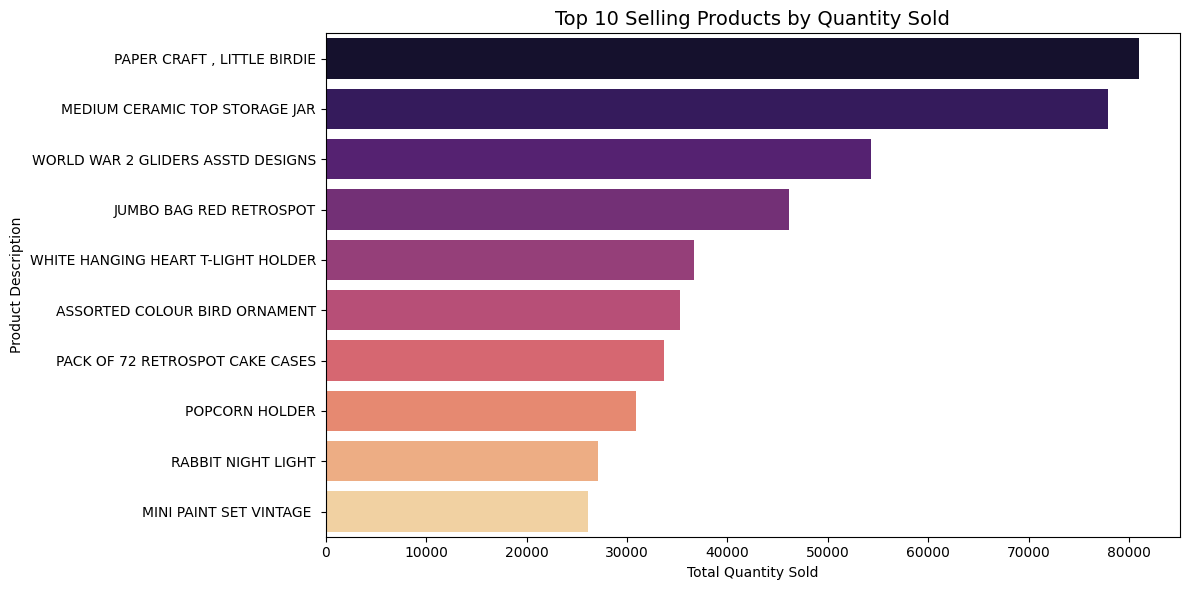

In [21]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index, palette='magma')
plt.title('Top 10 Selling Products by Quantity Sold', fontsize=14)
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A **horizontal bar chart** is ideal for comparing total quantities sold for each product. It clearly highlights which products are most in demand and allows stakeholders to **quickly identify top-performing inventory**.

##### 2. What is/are the insight(s) found from the chart?

- The top-selling product is **"PAPER CRAFT , LITTLE BIRDIE"** with **80,995 units sold**, followed by **"MEDIUM CERAMIC TOP STORAGE JAR"** and *"WORLD WAR 2 GLIDERS ASSTD DESIGNS"**.

- Many of the top products are **home decor, gift items**, or **craft-related**, indicating a customer preference toward **aesthetic and creative goods**.

- Items like **cake cases, popcorn holders**, and **night lights** suggest that the store appeals to both decorative and utility-focused shoppers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**

- These insights help businesses prioritize **stocking** high-demand items and **bundling them** in seasonal offers.

- Can be used to design **personalized recommendations** around top products and target **cross-selling**.

**Possible Caution:**

- Over-reliance on a few products could hurt sales if trends shift or competitors offer better deals.

- There is no clear evidence yet of product diversity — deeper analysis could be needed to ensure the store isn’t too niche.

#### Chart - 3

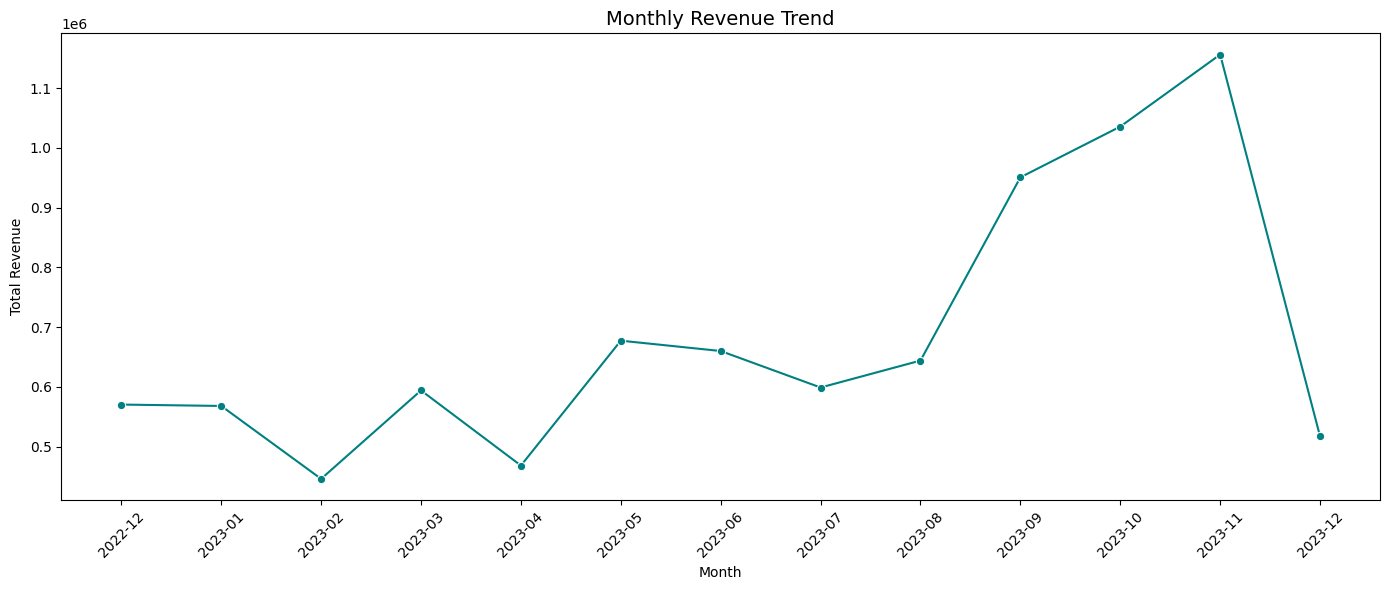

In [22]:
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

# Monthly revenue
monthly_sales = df.groupby('InvoiceMonth')['TotalPrice'].sum().reset_index()
monthly_sales['InvoiceMonth'] = monthly_sales['InvoiceMonth'].astype(str)

# Plot
plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_sales, x='InvoiceMonth', y='TotalPrice', marker='o', color='teal')
plt.title('Monthly Revenue Trend', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

We used a **line chart** to track the total revenue across each month. This format clearly reveals **sales trends, seasonality**, and any unusual spikes or dips in revenue over time, which is vital for strategic decision-making.

##### 2. What is/are the insight(s) found from the chart?

- Revenue steadily **increased from May 2023 onward**, peaking in **November 2023 (₹11.56 Lakhs)** and **October 2023 (₹10.35 Lakhs)**.

- There is a **sharp drop in December 2023**, possibly due to reduced activity post-holiday season or incomplete data.

- Earlier months like **February 2023 (₹4.46 Lakhs)** and **April 2023 (₹4.68 Lakhs)** saw relatively **lower sales**, showing mid-year volatility.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact**:

- Helps in **forecasting demand** and aligning **marketing** or **inventory** planning with high-revenue months like October and November.

- Supports **seasonal promotions or stock preparation** around the peak months.

**Cautionary Insight**:

- Sudden drop in **December 2023** may indicate operational issues, shipment delays, or lower engagement post-sales season — this may need further investigation.

- The volatility in early 2023 suggests that **consistent engagement strategies** might be required during off-peak periods.

#### Chart - 4

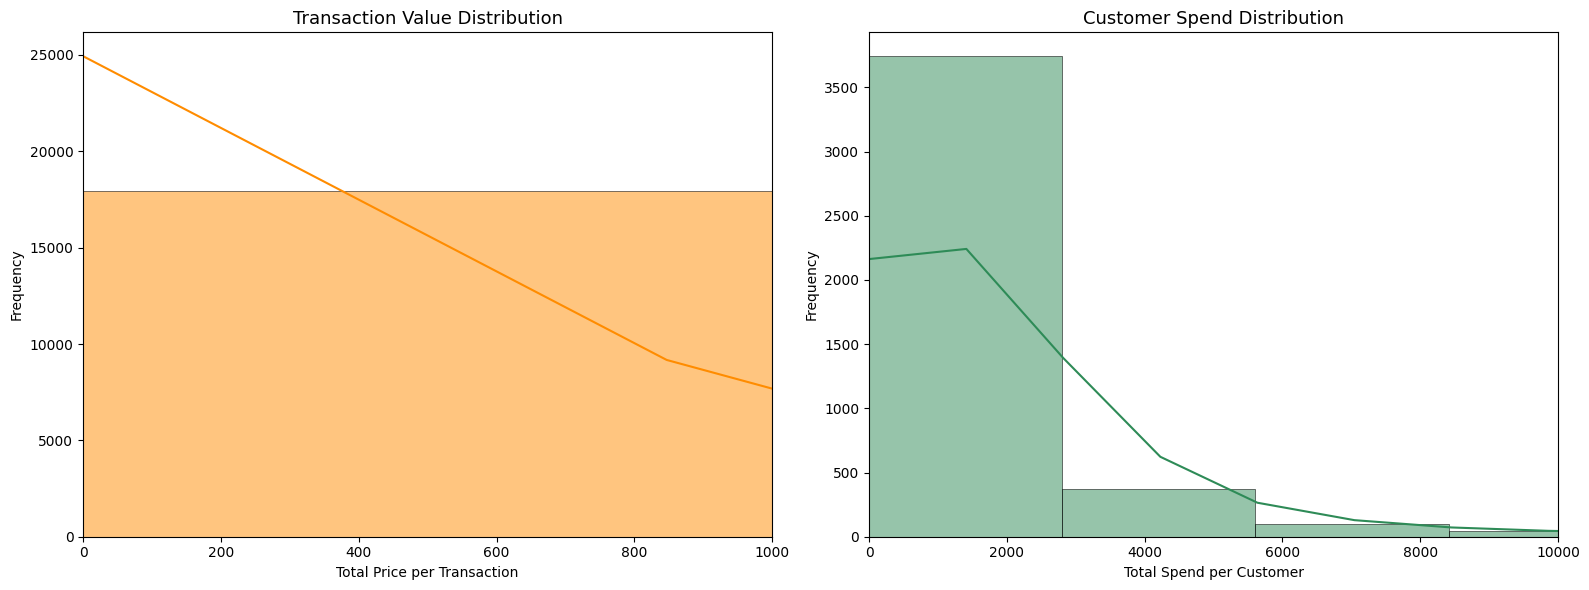

In [23]:
invoice_total = df.groupby('InvoiceNo')['TotalPrice'].sum()
customer_total = df.groupby('CustomerID')['TotalPrice'].sum()

plt.figure(figsize=(16,6))

# Subplot 1: Transaction-Level
plt.subplot(1, 2, 1)
sns.histplot(invoice_total, bins=100, kde=True, color='darkorange')
plt.title('Transaction Value Distribution', fontsize=13)
plt.xlabel('Total Price per Transaction')
plt.ylabel('Frequency')
plt.xlim(0, 1000)

# Subplot 2: Customer-Level
plt.subplot(1, 2, 2)
sns.histplot(customer_total, bins=100, kde=True, color='seagreen')
plt.title('Customer Spend Distribution', fontsize=13)
plt.xlabel('Total Spend per Customer')
plt.ylabel('Frequency')
plt.xlim(0, 10000)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

We used side-by-side **histograms** to compare monetary value distribution across individual transactions and entire customers. This helps identify **how customers spend per purchase** and their **overall lifetime value**, both of which are crucial for segmentation and retention strategies.

##### 2. What is/are the insight(s) found from the chart?

**Transaction-Level Insights:**
- The distribution is **right-skewed**, with **most transactions being of low value**, and a **few very large purchases**.

- There are **some rare, high-value transactions**, indicating **bulk buying behavior** by a few customers.

**Customer-Level Insights:**
- Most customers **spend relatively little over time**, but the distribution shows **significant outliers** — a small group of customers contributes to a **large portion of total revenue**.

- This suggests a **long-tail behavior**, where a few high-value customers drive overall business performance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

- Helps the business identify **high-value customers** for loyalty or retention programs.

- Allows creation of **segmented campaigns** — e.g., upselling to medium-spenders, or re-engaging low-spending customers.

- Understanding that most purchases are low-cost helps focus marketing on **volume-based promotions** rather than big-ticket items.

**Caution:**

- The business appears **reliant on a few large customers** — losing even one top spender could significantly impact revenue.

- High transaction variance could challenge consistent forecasting.

#### Chart - 5

In [24]:
# Reference date for Recency (usually day after the latest InvoiceDate)
latest_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# RFM Calculation
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                  # Frequency
    'TotalPrice': 'sum'                                      # Monetary
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

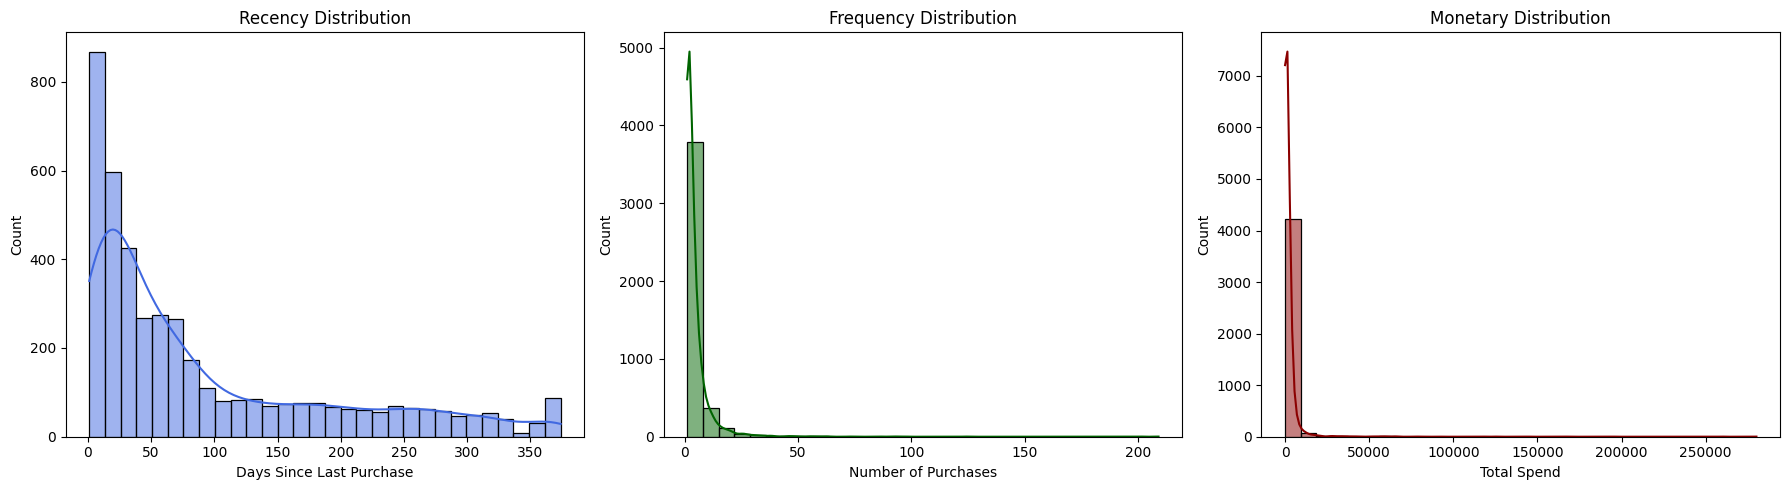

In [25]:
plt.figure(figsize=(18,5))

# Recency
plt.subplot(1, 3, 1)
sns.histplot(rfm['Recency'], bins=30, kde=True, color='royalblue')
plt.title('Recency Distribution')
plt.xlabel('Days Since Last Purchase')

# Frequency
plt.subplot(1, 3, 2)
sns.histplot(rfm['Frequency'], bins=30, kde=True, color='darkgreen')
plt.title('Frequency Distribution')
plt.xlabel('Number of Purchases')

# Monetary
plt.subplot(1, 3, 3)
sns.histplot(rfm['Monetary'], bins=30, kde=True, color='darkred')
plt.title('Monetary Distribution')
plt.xlabel('Total Spend')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

We visualized the distribution of **Recency, Frequency, and Monetary (RFM)** scores using histograms. These are essential features in **customer segmentation**, helping us understand customer behavior patterns such as recent activity, loyalty, and spending power.

##### 2. What is/are the insight(s) found from the chart?

#### Recency:
- Most customers made their last purchase within the past 50 days, indicating active engagement.
- A long tail shows many customers haven’t purchased in over 300+ days, indicating churn risk.

#### Frequency:
- Majority of customers made only 1–5 purchases.
- A few highly loyal customers made over 100+ purchases (e.g., one made 209 purchases).

#### Monetary:
- Most customers spent less than ₹2,000 in total.
- A few customers contributed a large portion of the revenue (e.g., ₹2.8 Lakhs by a single customer).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**
- Enables targeted strategies:
  - Retain recent & frequent buyers via loyalty rewards.
  - Re-engage churned customers through remarketing.
  - Upsell to frequent customers with bundled offers.
- Useful for RFM-based **customer segmentation** (e.g., High-Value, At-Risk).

**Negative Indicators:**
- Heavy dependence on a few top spenders — losing one could significantly impact revenue.
- High recency values point to a potential churn group needing attention.

#### Chart - 6

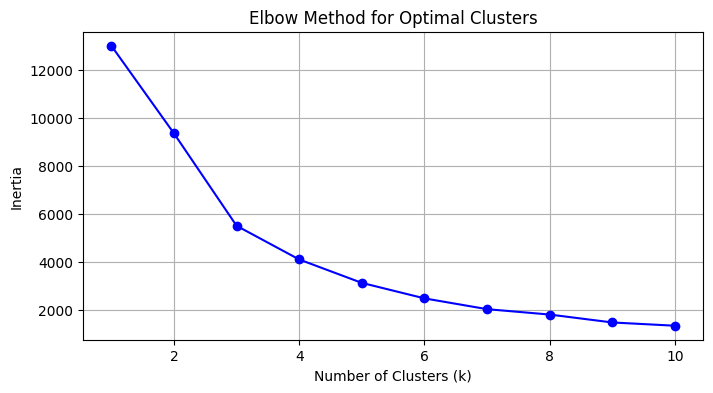

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Scale the RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Step 2: Use Elbow Method to find optimal k
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

# Step 3: Plot the Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

We used the Elbow Method to determine the optimal number of customer segments (clusters) based on RFM scores. This is a key step before applying clustering algorithms like K-Means to avoid underfitting or overfitting.

##### 2. What is/are the insight(s) found from the chart?

- The inertia drops **significantly from k=1 to k=4**, indicating better-defined clusters with each additional segment.
- After **k=4**, the reduction in inertia becomes marginal, forming an "elbow" at **k=4**.
- This suggests that **4 clusters** is the ideal balance between model complexity and accuracy.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, absolutely.**

- Identifying the right number of customer segments ensures **more accurate and meaningful segmentation**.
- Each cluster can now be analyzed and **labeled** (e.g., High-Value, Regular, Occasional, At-Risk), allowing the business to:
  - Personalize marketing efforts
  - Optimize retention strategies
  - Allocate resources more efficiently.

#### Chart - 7

In [27]:
from sklearn.cluster import KMeans

# Run KMeans with k=4
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# To analyze each cluster
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Num_Customers'}).reset_index()

# Sort for easy viewing (optional)
cluster_summary = cluster_summary.sort_values('Monetary', ascending=False)
cluster_summary.style.background_gradient(cmap='YlGnBu')

,Cluster,Recency,Frequency,Monetary,Num_Customers
2,2,7.384615,82.538462,127187.959231,13
3,3,15.500000,22.333333,12690.500392,204
0,0,43.702685,3.682711,1353.625312,3054
1,1,248.075914,1.552015,478.848773,1067


##### 1. Why did you pick the specific chart?

This table summarizes the customer segments formed using K-Means clustering based on their Recency, Frequency, and Monetary (RFM) scores. It allows for direct comparison between clusters and helps identify customer types based on purchasing behavior.


##### 2. What is/are the insight(s) found from the chart?

- **Cluster 2 – High-Value Customers**:
  - Most recent buyers (avg Recency = 7.38 days)
  - Very frequent purchases (~83 times)
  - Spent the most (~₹1.27 Lakhs)
  - Smallest group (13 customers) but highest value
    

- **Cluster 3 – Regular Customers**:
  - Recent activity (avg Recency = 15.5 days)
  - Decent frequency (~22 purchases)
  - Good monetary value (~₹12.7K)


- **Cluster 0 – Occasional Shoppers**:
  - Moderate recency (43.7 days ago)
  - Low frequency (~3.68 times)
  - Modest spend (~₹1.35K)
  - Largest group (3054 customers)


- **Cluster 1 – At-Risk Customers**:
  - Haven’t purchased in a long time (~248 days)
  - Rarely purchase (~1.5 times)
  - Low spend (~₹479)
  - Potential churn group

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes.** This analysis enables targeted actions:
- **High-Value** → Prioritize with loyalty programs and premium services
- **Regular** → Upsell new collections or offers
- **Occasional** → Encourage with reminders and seasonal deals
- **At-Risk** → Win-back campaigns or feedback loops

RFM-based segmentation helps improve retention, marketing ROI, and overall customer satisfaction.

#### Chart - 8

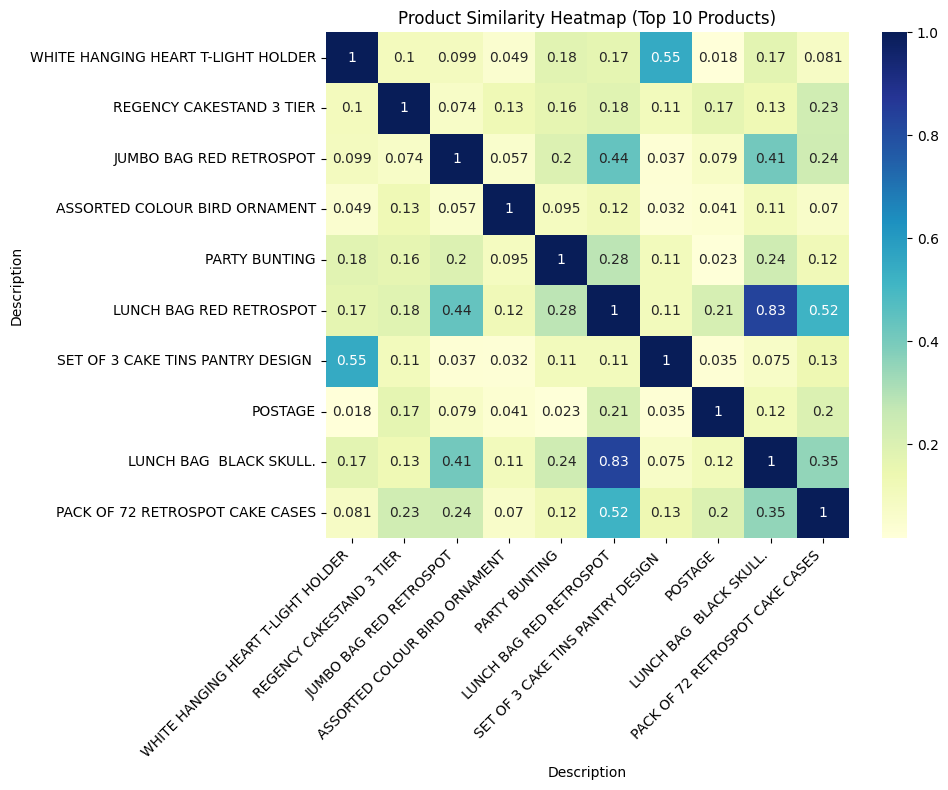

In [28]:
from sklearn.metrics.pairwise import cosine_similarity

# Create pivot table (CustomerID x Product Description)
pivot_table = df.pivot_table(index='CustomerID', 
                             columns='Description', 
                             values='Quantity', 
                             aggfunc='sum').fillna(0)

#Compute Cosine Similarity between products
product_similarity = cosine_similarity(pivot_table.T)

# Convert to DataFrame for heatmap and lookups
product_sim_df = pd.DataFrame(product_similarity, 
                              index=pivot_table.columns, 
                              columns=pivot_table.columns)

# Select top 10 popular products
top_10_products = df['Description'].value_counts().head(10).index

# Plot similarity heatmap for top 10
plt.figure(figsize=(10, 8))
sns.heatmap(product_sim_df.loc[top_10_products, top_10_products], 
            annot=True, cmap='YlGnBu')
plt.title('Product Similarity Heatmap (Top 10 Products)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This heatmap visualizes the **cosine similarity** between the top 10 most frequently purchased products. It helps identify which products are commonly bought together by similar customers, forming the foundation of an **item-based collaborative filtering** recommendation system.


##### 2. What is/are the insight(s) found from the chart?

- **LUNCH BAG RED RETROSPOT** and **LUNCH BAG BLACK SKULL.** have a high similarity score of **0.83**, suggesting customers who buy one often buy the other — possibly due to similar utility or style.
- **SET OF 3 CAKE TINS PANTRY DESIGN** is closely associated with **WHITE HANGING HEART T-LIGHT HOLDER** (**0.55**), which may indicate common kitchen décor purchases.
- **PACK OF 72 RETROSPOT CAKE CASES** shows decent similarity with both **LUNCH BAG RED RETROSPOT** (**0.52**) and **LUNCH BAG BLACK SKULL.** (**0.35**), suggesting these items might be part of baking-related purchases.
- **POSTAGE** appears frequently with various products but has low correlation — possibly due to shipping charges added to many orders.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes.** These insights power a **personalized product recommendation engine** that:

- Recommends similar or complementary items
- Increases cross-sell and up-sell opportunities
- Enhances the customer shopping experience
- Boosts cart value and retention

By using real customer behavior patterns, the platform can dynamically suggest items **"Customers who bought this also bought..."**, improving relevance and sales.


## ***4. Clustering Methodology***

#### RFM Calculation

In [29]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']

#### Scaling the RFM Values

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

#### Elbow Method Plot

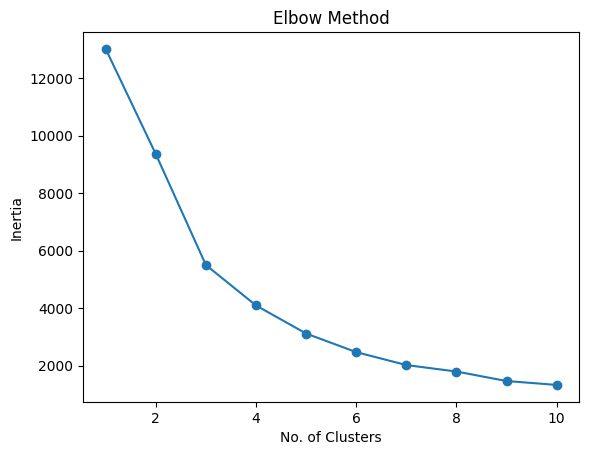

In [31]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("No. of Clusters")
plt.ylabel("Inertia")
plt.show()

#### Silhouette Score to decide the number of clusters

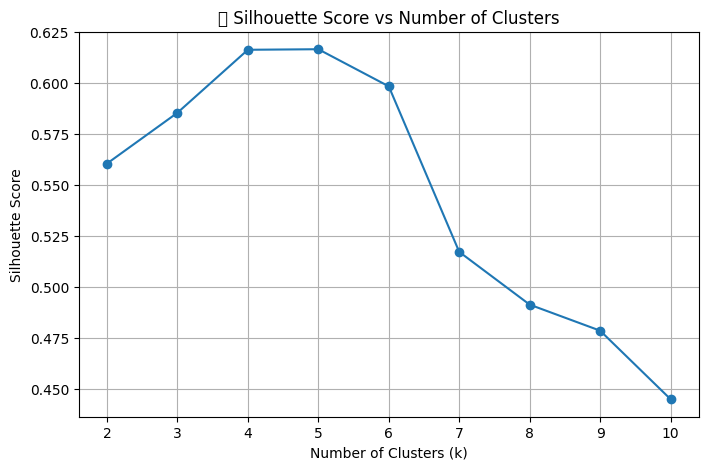

In [32]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

silhouette_scores = []
inertias = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)  # Assuming `rfm_scaled` is your standardized RFM data
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(rfm_scaled, labels))
    inertias.append(kmeans.inertia_)

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('📈 Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

#### Final Clustering with Chosen k = 4

In [33]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

#### Cluster Interpretation

In [34]:
rfm_cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'Cluster': 'count'
}).rename(columns={'Cluster': 'Num_Customers'}).reset_index()

rfm_cluster_summary = rfm_cluster_summary.sort_values(by='Cluster')
rfm_cluster_summary

,Cluster,Recency,Frequency,Monetary,Num_Customers
0,0,43.702685,3.682711,1353.625312,3054
1,1,248.075914,1.552015,478.848773,1067
2,2,7.384615,82.538462,127187.959231,13
3,3,15.500000,22.333333,12690.500392,204


### Interpreting Customer Clusters Based on RFM Averages

| Cluster | RFM Characteristics                                 | Label            |
| ------- | --------------------------------------------------- | ---------------- |
| 2       | Low Recency, High Frequency, High Monetary          | **High-Value**  |
| 3       | Low Recency, Medium-High Frequency, Medium Monetary | **Regular**      |
| 0       | Medium Recency, Low-Mid Frequency & Monetary        | **Occasional**   |
| 1       | High Recency, Low Frequency, Low Monetary           | **At-Risk**      |

#### 3D Scatter Plot for Cluster Visualization

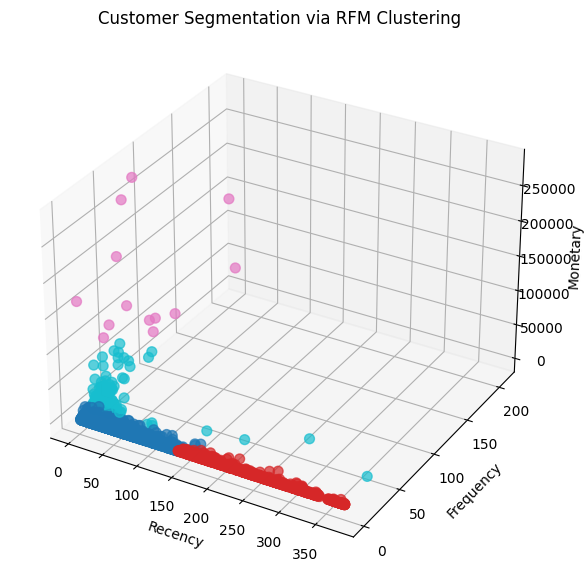

In [35]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 3D scatter with color-coded clusters
ax.scatter(rfm['Recency'], rfm['Frequency'], rfm['Monetary'], 
           c=rfm['Cluster'], cmap='tab10', s=50, alpha=0.7)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('Customer Segmentation via RFM Clustering')

plt.show()

### Saving the Best Model

In [36]:
import joblib

# Save the KMeans model
joblib.dump(kmeans, 'kmeans_model.pkl')

rfm['Cluster'] = kmeans.labels_
rfm.to_csv("rfm.csv", index=False)


In this step, we implemented customer segmentation using RFM (Recency, Frequency, Monetary) analysis and unsupervised clusteringid:

- **RFM Feature Engineering:**  
  - *Recency* = Days since last purchase  
  - *Frequency* = Number of purchases per customer  
  - *Monetary* = Total spend per customer

- **Standardized RFM values** to bring them onto the same scale

- **Cluster Evaluation:**
  - Used the **Elbow Method** to inspect inertia
  - Computed **Silhouette Scores** for `k=2` to `k=10`  
  - Final choice: `k=4` clusters (best trade-off between compactness & separation)

- **Cluster Labelling:**  
  Based on average RFM values per cluster:

| Cluster | RFM Characteristics                                 | Segment Label     |
| ------- | --------------------------------------------------- | ----------------- |
| 2       | Low Recency, High Frequency, High Monetary          | **High-Value** ✅  |
| 3       | Low Recency, Medium-High Frequency, Medium Monetary | **Regular**        |
| 0       | Medium Recency, Low-Mid Frequency & Monetary        | **Occasional**     |
| 1       | High Recency, Low Frequency, Low Monetary           | **At-Risk**        |

- **Final Model Saved:**  
  The best-performing KMeans model (`k=4`) was saved as `kmeans_rfm_model.pkl` for deployment in the Streamlit application.

This segmentation lays the foundation for personalized marketing, retention strategies, and customer lifetime value prediction.


## ***5. Product Recommendation System (Collaborative Filtering)***

#### Pivot Table & Cosine Similarity

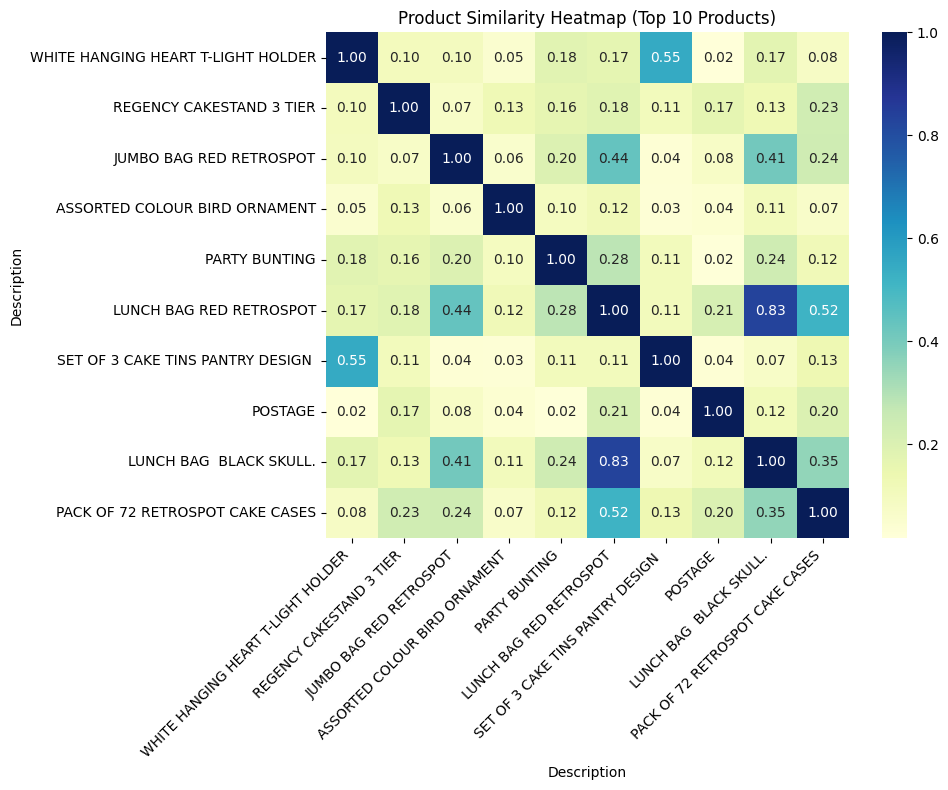

In [37]:
pivot_table = df.pivot_table(index='CustomerID', columns='Description', values='Quantity', aggfunc='sum').fillna(0)
product_similarity = cosine_similarity(pivot_table.T)
product_sim_df = pd.DataFrame(product_similarity, index=pivot_table.columns, columns=pivot_table.columns)

top_10_products = df['Description'].value_counts().head(10).index

# Plot similarity heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(product_sim_df.loc[top_10_products, top_10_products],
            annot=True,
            fmt=".2f",
            cmap='YlGnBu')

plt.title('Product Similarity Heatmap (Top 10 Products)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### Recommendation Function

In [38]:
def recommend_products(product_name, similarity_df, top_n=5):
    if product_name not in similarity_df.columns:
        return f"Product '{product_name}' not found in dataset."
    
    similar_scores = similarity_df[product_name].sort_values(ascending=False)
    recommendations = similar_scores.drop(product_name).head(top_n)
    return recommendations


In [39]:
product = "WHITE HANGING HEART T-LIGHT HOLDER"
recommendations = recommend_products(product, product_sim_df)
print(f"Recommended Products for '{product}':\n")
print(recommendations)

Recommended Products for 'WHITE HANGING HEART T-LIGHT HOLDER':

Description
GIN + TONIC DIET METAL SIGN         0.750192
RED HANGING HEART T-LIGHT HOLDER    0.658714
WASHROOM METAL SIGN                 0.643520
LAUNDRY 15C METAL SIGN              0.642200
GREEN VINTAGE SPOT BEAKER           0.631463
Name: WHITE HANGING HEART T-LIGHT HOLDER, dtype: float64


### Save Model for Streamlit

In [40]:
import pickle

with open('product_similarity.pkl', 'wb') as f:
    pickle.dump(product_sim_df, f)

To personalize the shopping experience, we built a recommendation system using **item-based collaborative filtering** powered by **cosine similarity**.

### Methodology:
- Constructed a **pivot table** of shape `(CustomerID x Product Description)` with total quantities.
- Applied **cosine similarity** on the transposed matrix (`Product x Product`) to compute how similar products are, based on co-purchase behavior.
- Selected the top 10 selling products and visualized their relationships using a **heatmap**.
- Built a function that returns the **top 5 similar products** to any given product name.
- Finally, **saved the similarity matrix** to use later in the Streamlit app.

### Sample Recommendation Output:
**Input Product:** `WHITE HANGING HEART T-LIGHT HOLDER`

**Recommended Products:**

| Product                             | Similarity Score |
|-------------------------------------|------------------|
| GIN + TONIC DIET METAL SIGN         | 0.7502           |
| RED HANGING HEART T-LIGHT HOLDER    | 0.6587           |
| WASHROOM METAL SIGN                 | 0.6435           |
| LAUNDRY 15C METAL SIGN              | 0.6422           |
| GREEN VINTAGE SPOT BEAKER           | 0.6315           |

These recommendations are based on real customer purchase patterns and help improve **cross-sell** and **up-sell** opportunities.

## ***6. Streamlit App Deployment***

### 🖼 Streamlit App Preview

#### 1. Home Page
![Home Page](images/home_page.png)

#### 2. Customer Segmentation
![Customer Segmentation](images/customer_segmentation.png)

#### 3. Product Recommendation
![Product Recommendation](images/product_recommendation.png)

We developed a Streamlit web app to make the insights and functionalities interactive.

#### 🏠 Home Page
- A simple introduction and summary of the app’s purpose.

#### 🎯 Customer Segmentation Module
- Input fields for:
  - **Recency** (days since last purchase)
  - **Frequency** (number of transactions)
  - **Monetary** (total spend)
- Button to **Predict Cluster**
- Displays the customer segment label:
  - **High-Value**, **Regular**, **Occasional**, or **At-Risk**

#### 🛍 Product Recommendation Module
- Input box for **Product Name**
- Returns **Top 5 Similar Products** using item-based collaborative filtering
- Built using **cosine similarity** on the Customer × Product matrix

---

### 🗃 Files Used in the Streamlit App

| File Name               | Purpose                                      |
|------------------------|----------------------------------------------|
| `cleaned_data.csv`     | Cleaned dataset used for the dashboard       |
| `rfm.csv`              | RFM values with assigned cluster labels      |
| `kmeans_model.pkl`     | Saved clustering model (KMeans)              |
| `product_similarity.pkl` | Cosine similarity matrix of products        |


---

## ✅ Final Thoughts

This project included:

- 📊 **Exploratory Data Analysis (EDA)** of e-commerce transactions  
- 👤 **Customer segmentation** using RFM analysis and clustering  
- 🧠 **Product recommendation** using collaborative filtering  
- 🌐 **Deployment** using an interactive **Streamlit application**

> This end-to-end solution provides powerful business insights and tools for personalized marketing and better customer engagement.


# **Conclusion**



This project demonstrates a complete end-to-end data science workflow applied to an e-commerce dataset, covering:

- 📊 **Exploratory Data Analysis (EDA)**  
  Gained insights into customer transactions, top-selling products, seasonal trends, and purchasing patterns.

- 👤 **Customer Segmentation using RFM Analysis**  
  Identified distinct customer groups (High-Value, Regular, Occasional, At-Risk) using Recency, Frequency, and Monetary metrics, followed by clustering via KMeans.

- 🧠 **Product Recommendation System**  
  Built an item-based collaborative filtering system using cosine similarity to recommend similar products based on purchase behavior.

- 🌐 **Deployment via Streamlit**  
  Developed an interactive Streamlit web application with three sections: Home, Customer Segmentation, and Product Recommendation — enabling real-time prediction and product suggestion.

---

### ✅ Business Value

- Helps businesses understand their customer base better through segmentation  
- Enables targeted marketing and retention strategies  
- Provides personalized product recommendations to improve customer engagement and sales

---

> 🎯 This project showcases how data-driven solutions can empower smarter decision-making in e-commerce, offering both strategic insigs and actionable outcomes.

